# Statistics: a Guide to the use of Statistical Methods in the Physical Sciences

### Chapter 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scripts.distributions as dist
import scipy

##### Binomial Distribution

Describes processes with a given number of identical trials, with two possible outcomes.

$$
P(r;p,n) = p^r(1-p)^{n-r}\frac{n!}{r!(n-r!)}
$$

$p$ is probability of success, $1-p$ probability of failure, $n$ is number of trials and $r$ is number of successes.

**Properties of the binomial distribution**
$$
\text{Mean number of success: } \langle r \rangle = np\\
\text{Variance: } V(r) = np(1 - p)
$$


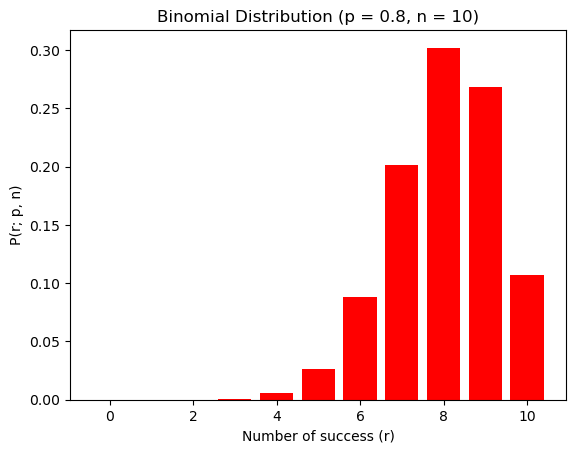

In [2]:
r_vals = np.arange(0,11)
p = 0.8
n = 10
dist.plot_binomial(r_vals, p, n)

Checking the validity of the implementation comparing its output with the function provided by SciPy.

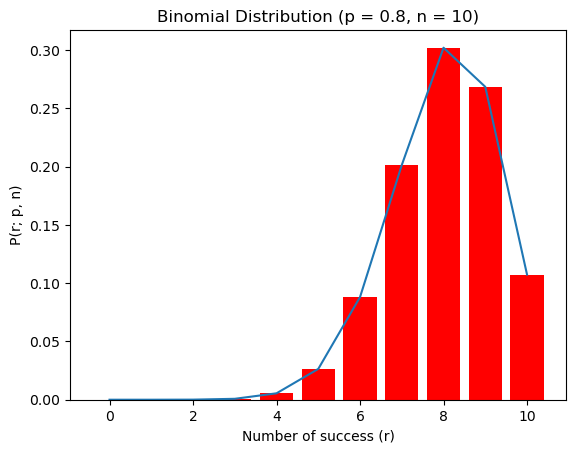

In [4]:
dist.plot_binomial(r_vals,p,n)
plt.plot([scipy.stats.binom.pmf(k, n, p) for k in r_vals])

##### Poisson Distribution

Describes cases where there are particular outcomes but no idea of the number of trials - sharp events occurring in a continuum.

$$
P(r;\lambda) = \frac{e^{-\lambda}\lambda^r}{r!}
$$
probability of obtaining r events if the mean expected number is $\lambda$.

**Properties of the Poisson distribution**

$$
\text{Mean number of events: } \langle r \rangle = \lambda\\
\text{Variance: } V(r) = \lambda
$$

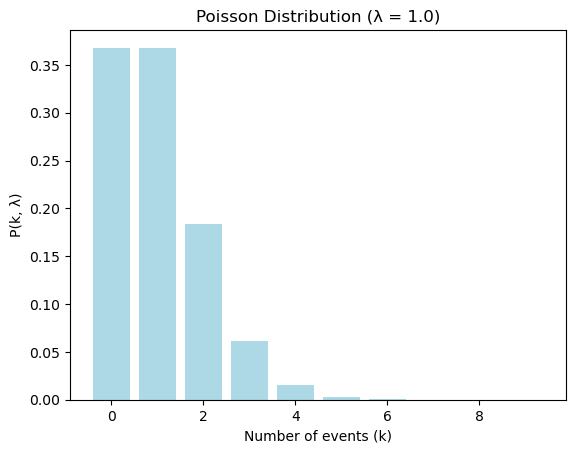

In [5]:
lam = 1.0
k_vals = np.arange(0, 10)
dist.plot_poisson(k_vals, lam)

Checking the validity of the implementation comparing its output with the function provided by SciPy.

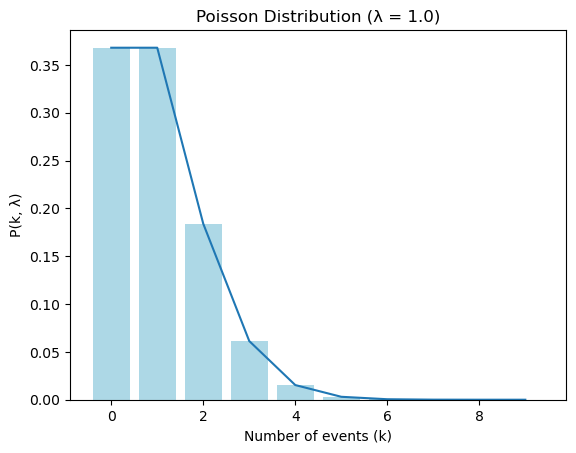

In [6]:
dist.plot_poisson(k_vals, lam)
plt.plot([scipy.stats.poisson.pmf(k, lam) for k in k_vals])

##### Normal Distribution

Bell-shaped curve centred on $x=\mu$ and width controlled by the standard deviation $\sigma$.

$$
P(x;\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-(x-\mu)^2/2\sigma^2}
$$

**Properties of the normal distribution**

$$
\text{it is normalized to 1: } \int^\infty_\infty P(x;\mu,\sigma)dx = 1\\
\text{$\mu$ is the mean} \int^\infty_\infty xP(x;\mu,\sigma)dx = \mu\\
\text{$\sigma^2$ is the variance} \int^\infty_\infty (x - \mu)^2P(x;\mu,\sigma)dx = \sigma^2
$$


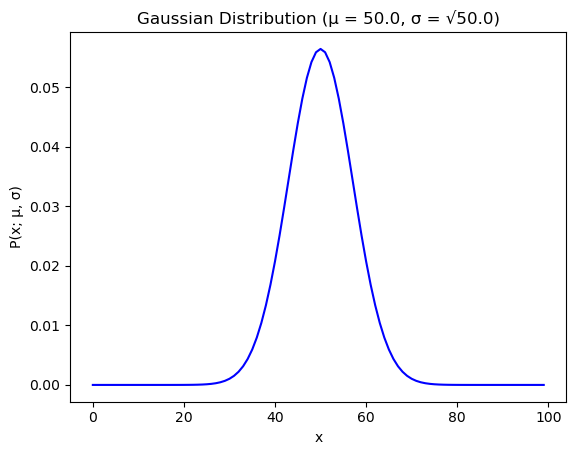

In [7]:
x_vals = np.arange(0,100)
mu = 50.0
sig = math.sqrt(mu)

dist.plot_normal(x_vals, mu, sig)

Checking the validity of the implementation comparing its output with the function provided by SciPy.

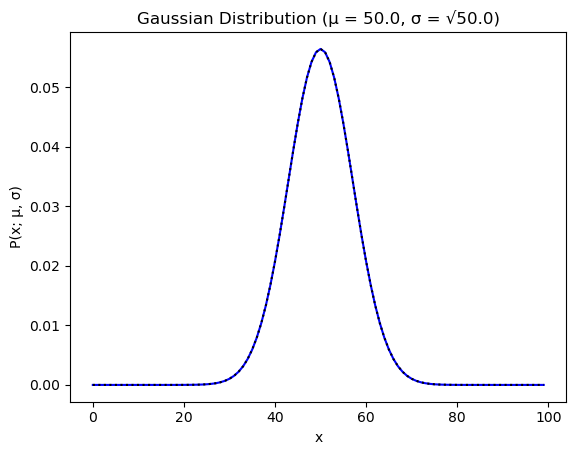

In [8]:
dist.plot_normal(x_vals, mu, sig)
plt.plot([scipy.stats.norm.pdf(x, loc=mu, scale=sig) for x in x_vals], linestyle=":", color='black')

##### Binomial vs Gaussian distribution

For larger $n$, the binomial tends to a gaussian given $\mu = np$ and $\sigma = \sqrt{np(1-p)}$.

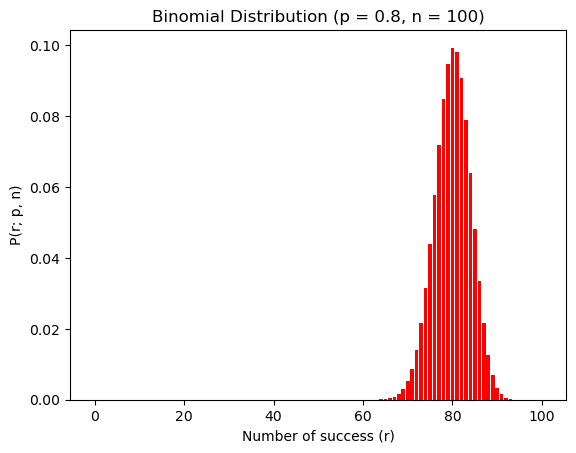

In [9]:
r_vals = np.arange(0,101)
p = 0.8
n = 100
bin_expected = n * p
bin_variance = n * p * (1 - p)

dist.plot_binomial(r_vals, p, n)

Text(0.5, 1.0, 'Binomial distribution vs. Gaussian (μ = 80.0, σ = √16.0)')

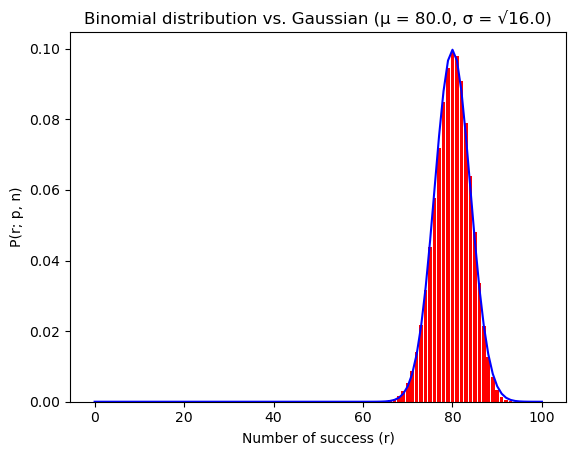

In [10]:
dist.plot_normal(r_vals, bin_expected, math.sqrt(bin_variance))
dist.plot_binomial(r_vals, p, n)

plt.title(f"Binomial distribution vs. Gaussian (μ = {bin_expected}, σ = √{round(bin_variance, 2)})")

##### Poisson vs Gaussian distribution

For large $\lambda$, the poisson distribution tends to a gaussian given $\mu = \lambda$ and $\sigma = \sqrt{\lambda}$.

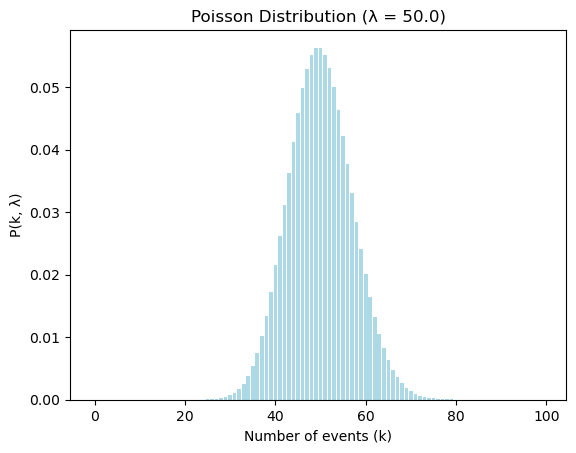

In [11]:
lam = 50.0
k_vals = np.arange(0, 100)

dist.plot_poisson(k_vals, lam)

Text(0.5, 1.0, 'Poisson distribution vs. Gaussian (μ = 50.0, σ = √50.0)')

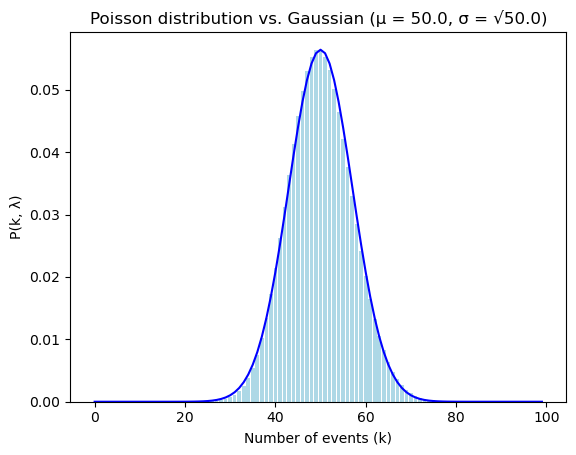

In [12]:
dist.plot_normal(k_vals, lam, math.sqrt(lam))
dist.plot_poisson(k_vals, lam)
plt.title(f"Poisson distribution vs. Gaussian (μ = {lam}, σ = √{lam})")

#### Problems

Problem 1:

In [13]:
r = 100
p = 0.995
n = 100
print(f"{round(dist.binomial_dist(r, p, n) * 100)} %")

61 %


Problem 3:

In [14]:
lam = 15.7 / 2
prob_less5 = 0
for r in range(0,5):
    prob_less5 = prob_less5 + dist.poisson_dist(r, lam)
prob_less5

0.10854834297002636

Problem 4:

In [16]:
g = 0
for x in range(0,5):
    g = g + dist.normal_dist(x, lam, math.sqrt(lam))
g

0.11329999000696109

Problem 5:

In [17]:
p = 0.01
r = 0    #student is still waiting
n = 60
dist.binomial_dist(r, p, n)

0.5471566423907612

In [18]:
lam = 60 * 0.01
r = 0
dist.poisson_dist(r, lam)

0.5488116360940264